# Exploratory Data Analysis on New 3ds xl/ll Listings on Ebay 
Nintendo officially discontinued 3DS production on September 16, 2020, resulting in 3DS sales moving exclusively to second hand markets. Of these markets, Ebay is the most popular one to sell and buy the console in North America. In Japan there are many marketplaces which sell the console, as Nintendo sold larger amounts of the 3DS in Japan. Due to this, there have been discussions from North Americans about buying Japanese 3DS's. With this data we can compare the price difference between the two regions on Ebay. Ebay is selected as it features a similar amount of Japanese to North American sellers for New 3ds consoles.
### Data: 
- Data Set Gathered by using the filter for new 3ds xl/ll on Ebay then scraped on May 29, 2024
- Consists of every listing tagged as New 3ds xl/ll 
- Multiple listings in one have been removed for simplicity
- Each row is a listing on ebay with their listing price, shipping price, condition, auction, bids, and time remaining if there is an auction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Reading in csv file
df = pd.read_csv("Ebay_3ds_EDA.csv")

# dropping listings with a best offer because their final sale price is unknown
df = df.loc[df["No Best Offer"]]
df = df.drop(["No Best Offer"], axis= 1)

### Cleaning the columns


In [3]:
# defining columns to convert into string
cols = ["Title","Price", "Shipping", "Condition"]
df[cols] = df[cols].astype("string")
df

,Title,Price,Shipping,Condition,Is Auction?
0,New Nintendo 3DS XL LL Metallic Black Console...,C $200.03,+C $13.70 shipping,Pre-Owned,False
1,Nintendo New 3DS XL 32GB Handheld Gaming Syste...,C $130.17,+C $23.43 shipping,Parts Only,False
2,[ NEAR MINT ] NINTENDO NEW 3DS XL LL Pearl Whi...,C $287.62,+C $13.69 shipping,Pre-Owned,False
3,New ListingNew Nintendo 3DS XL System - Grey/B...,C $268.36,+C $27.50 shipping,Pre-Owned,False
5,L3886 Ship Free Nintendo new 3DS LL XL console...,C $229.52,Free shipping,Pre-Owned,True
...,...,...,...,...,...
3358,New Nintendo 3DS XL RED-001 SOLD AS IS FOR PAR...,C $164.42,+C $24.43 shipping,Parts Only,False
3359,New Nintendo 3DS XL Gray Black Metallic Consol...,C $287.75,+C $28.08 shipping,Pre-Owned,False
3360,Region Free Nintendo new 3DS LL XL Blue Japan...,C $164.43,+C $40.33 shipping,Pre-Owned,False
3361,USED new-Nintendo 3DS XL LL Metaric Blue Handh...,C $185.50,+C $31.52 shipping,Pre-Owned,False


In [4]:
# dropping listings with multiple listings within it
df_cln_temp = df.drop(df[df["Price"].str.contains("to")].index)

# dropping non-numerical values
df_cln = df_cln_temp.replace(to_replace={"Price": "[^.0-9]", 
                                         "Shipping": "[^.0-9]",},
                             value= {"Price": "", 
                                     "Shipping": "",},
                             regex= True)
# replacing na values 
df_cln["Shipping"] = df_cln["Shipping"].replace("", "0")
df_cln["Condition"] = df_cln["Condition"].fillna("Unknown")

# converting columns into float type and constructing a new column for full price
nums = ["Price", "Shipping"]
for i in nums:
    df_cln[i] = df_cln[i].astype("float", errors= "raise")
df_cln["Shipping"] = df_cln["Shipping"].fillna(0)
df_cln["Full Price"] = df_cln["Price"] + df_cln["Shipping"]

df_cln

,Title,Price,Shipping,Condition,Is Auction?,Full Price
0,New Nintendo 3DS XL LL Metallic Black Console...,200.03,13.70,Pre-Owned,False,213.73
1,Nintendo New 3DS XL 32GB Handheld Gaming Syste...,130.17,23.43,Parts Only,False,153.60
2,[ NEAR MINT ] NINTENDO NEW 3DS XL LL Pearl Whi...,287.62,13.69,Pre-Owned,False,301.31
3,New ListingNew Nintendo 3DS XL System - Grey/B...,268.36,27.50,Pre-Owned,False,295.86
5,L3886 Ship Free Nintendo new 3DS LL XL console...,229.52,0.00,Pre-Owned,True,229.52
...,...,...,...,...,...,...
3358,New Nintendo 3DS XL RED-001 SOLD AS IS FOR PAR...,164.42,24.43,Parts Only,False,188.85
3359,New Nintendo 3DS XL Gray Black Metallic Consol...,287.75,28.08,Pre-Owned,False,315.83
3360,Region Free Nintendo new 3DS LL XL Blue Japan...,164.43,40.33,Pre-Owned,False,204.76
3361,USED new-Nintendo 3DS XL LL Metaric Blue Handh...,185.50,31.52,Pre-Owned,False,217.02


### Removing any Outliers

In [5]:
# setting an upper quantile
outlier_up = df_cln["Full Price"].quantile(0.99)

# setting a lower quantile
outlier_down = df_cln["Full Price"].quantile(0.01)

df_fin = df_cln[(df_cln["Full Price"] < outlier_up) & (df_cln["Full Price"] > outlier_down)]
df_fin

,Title,Price,Shipping,Condition,Is Auction?,Full Price
0,New Nintendo 3DS XL LL Metallic Black Console...,200.03,13.70,Pre-Owned,False,213.73
1,Nintendo New 3DS XL 32GB Handheld Gaming Syste...,130.17,23.43,Parts Only,False,153.60
2,[ NEAR MINT ] NINTENDO NEW 3DS XL LL Pearl Whi...,287.62,13.69,Pre-Owned,False,301.31
3,New ListingNew Nintendo 3DS XL System - Grey/B...,268.36,27.50,Pre-Owned,False,295.86
5,L3886 Ship Free Nintendo new 3DS LL XL console...,229.52,0.00,Pre-Owned,True,229.52
...,...,...,...,...,...,...
3358,New Nintendo 3DS XL RED-001 SOLD AS IS FOR PAR...,164.42,24.43,Parts Only,False,188.85
3359,New Nintendo 3DS XL Gray Black Metallic Consol...,287.75,28.08,Pre-Owned,False,315.83
3360,Region Free Nintendo new 3DS LL XL Blue Japan...,164.43,40.33,Pre-Owned,False,204.76
3361,USED new-Nintendo 3DS XL LL Metaric Blue Handh...,185.50,31.52,Pre-Owned,False,217.02


### Creating a Region Column

In [16]:
# suppress the SettingWithCopyError
pd.options.mode.chained_assignment = None

# Creating a variable for Model
t = df_fin["Title"]
japan_filter_words = ((t.str.contains("japan", case= False)) | (t.str.contains("japanese", case = False)))
japan_filter_symbol = ((~t.str.contains("XL", case= False)) & (t.str.contains("LL", case= False)))
japan_3ds = df_fin.loc[japan_filter_words | japan_filter_symbol].index.values

model_dict = {}
for i in japan_3ds:
    model_dict[i] = "LL"
df_fin["Model"] = pd.Series(model_dict)
df_fin["Model"] = df_fin["Model"].fillna("XL")

In [17]:
# Creating a dummy variable for whether the listing is limited edition
vals = {}
limited_colourways = ["galaxy", "hyrule", "majora", "monster hunter 4", "monster hunter generation", "solgaleo", "samus", "animal crossing", "snes", "pikachu"]
for n in limited_colourways:
    temp = df_fin.loc[df_cln["Title"].str.contains(n, case= False)].index.values
    for i in temp:
        vals[i] = n
df_fin["Edition"] = pd.Series(vals)
df_fin["Edition"] = df_fin["Edition"].fillna("normal")

In [1]:
# Creating variable for whether the listing is a bundle
bundle_vals = {}
bundle_keys = ["bundle", "games", "cards", "case"]
for n in bundle_keys:
    temp = df_fin.loc[df_fin["Title"].str.contains(n, case= False)].index.values
    for i in temp:
        bundle_vals[i] = True
df_fin["Is Bundle?"] = pd.Series(bundle_vals)
df_fin["Is Bundle?"] = df_fin["Is Bundle?"].fillna(False)

NameError: name 'df_fin' is not defined

### Model and Condition Graphs

In [87]:
# adding missing conditions to the japanese models
missing_jp_val = [{"Condition": "Open Box", "Full Price": 0, "Shipping": 0, "Is Auction?": False, "Model": "LL"}, 
                  {"Condition": "Very Good - Refurbished", "Full Price": 0, "Shipping": 0, "Is Auction?": False, "Model": "LL"},
                  {"Condition": "Good - Refurbished", "Full Price": 0, "Shipping": 0, "Is Auction?": False, "Model": "LL"},
                  {"Condition": "Excellent - Refurbished", "Full Price": 0, "Shipping": 0, "Is Auction?": False, "Model": "LL"}]

# appending missing values to the dataframe
df_fin = df_fin._append(missing_jp_val, ignore_index=True)

# splitting data frame into XL and LL models
xl_df = df_fin.loc[df_fin["Model"] == "XL"]
ll_df = df_fin.loc[df_fin["Model"] == "LL"]

# selecting graphing columns
dfu = xl_df[["Condition", "Full Price"]]
dfj = ll_df[["Condition", "Full Price"]]

x = dfu["Condition"].unique()
x_axis = np.arange(len(x))

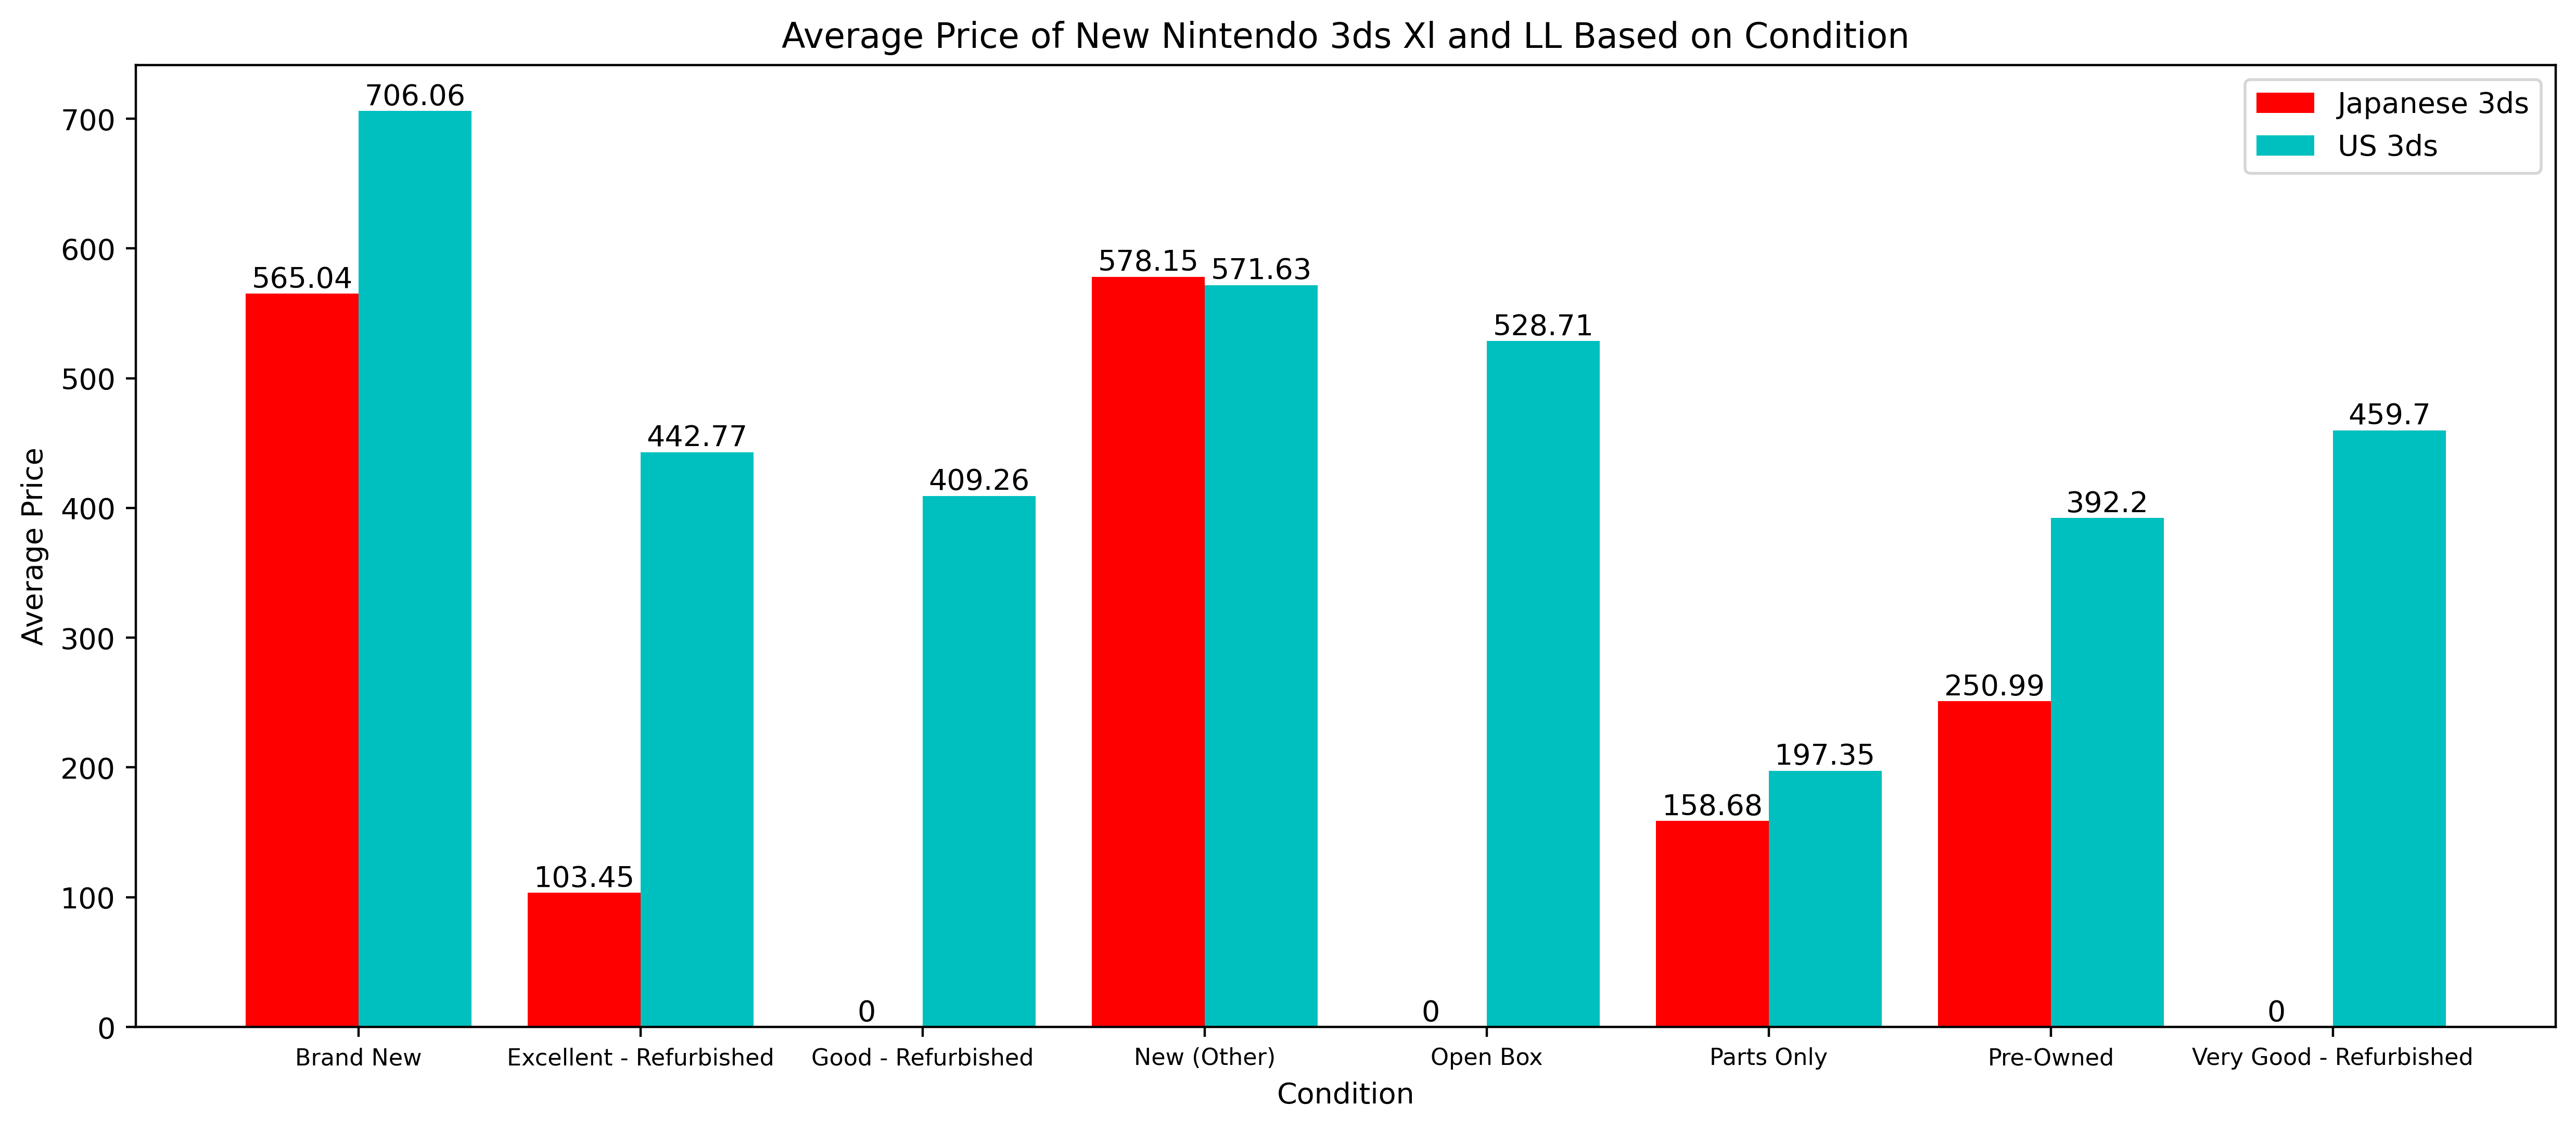

In [88]:
jp_prices = dfj.groupby("Condition")["Full Price"].mean()
us_prices = dfu.groupby("Condition")["Full Price"].mean()

plt.figure(figsize=(15,6), dpi= 400)
j = plt.bar(x_axis - 0.2, jp_prices.round(decimals= 2), 0.4, label = "Japanese 3ds", color= "r")
u = plt.bar(x_axis + 0.2, us_prices.round(decimals= 2), 0.4, label = "US 3ds", color= "c")
plt.xticks(x_axis, sorted(x), fontsize= 8)
plt.title("Average Price of New Nintendo 3ds Xl and LL Based on Condition")
plt.xlabel("Condition")
plt.ylabel("Average Price")

plt.bar_label(j)
plt.bar_label(u)
plt.legend()
plt.show()

### Graphing the Quantities of Each Condition

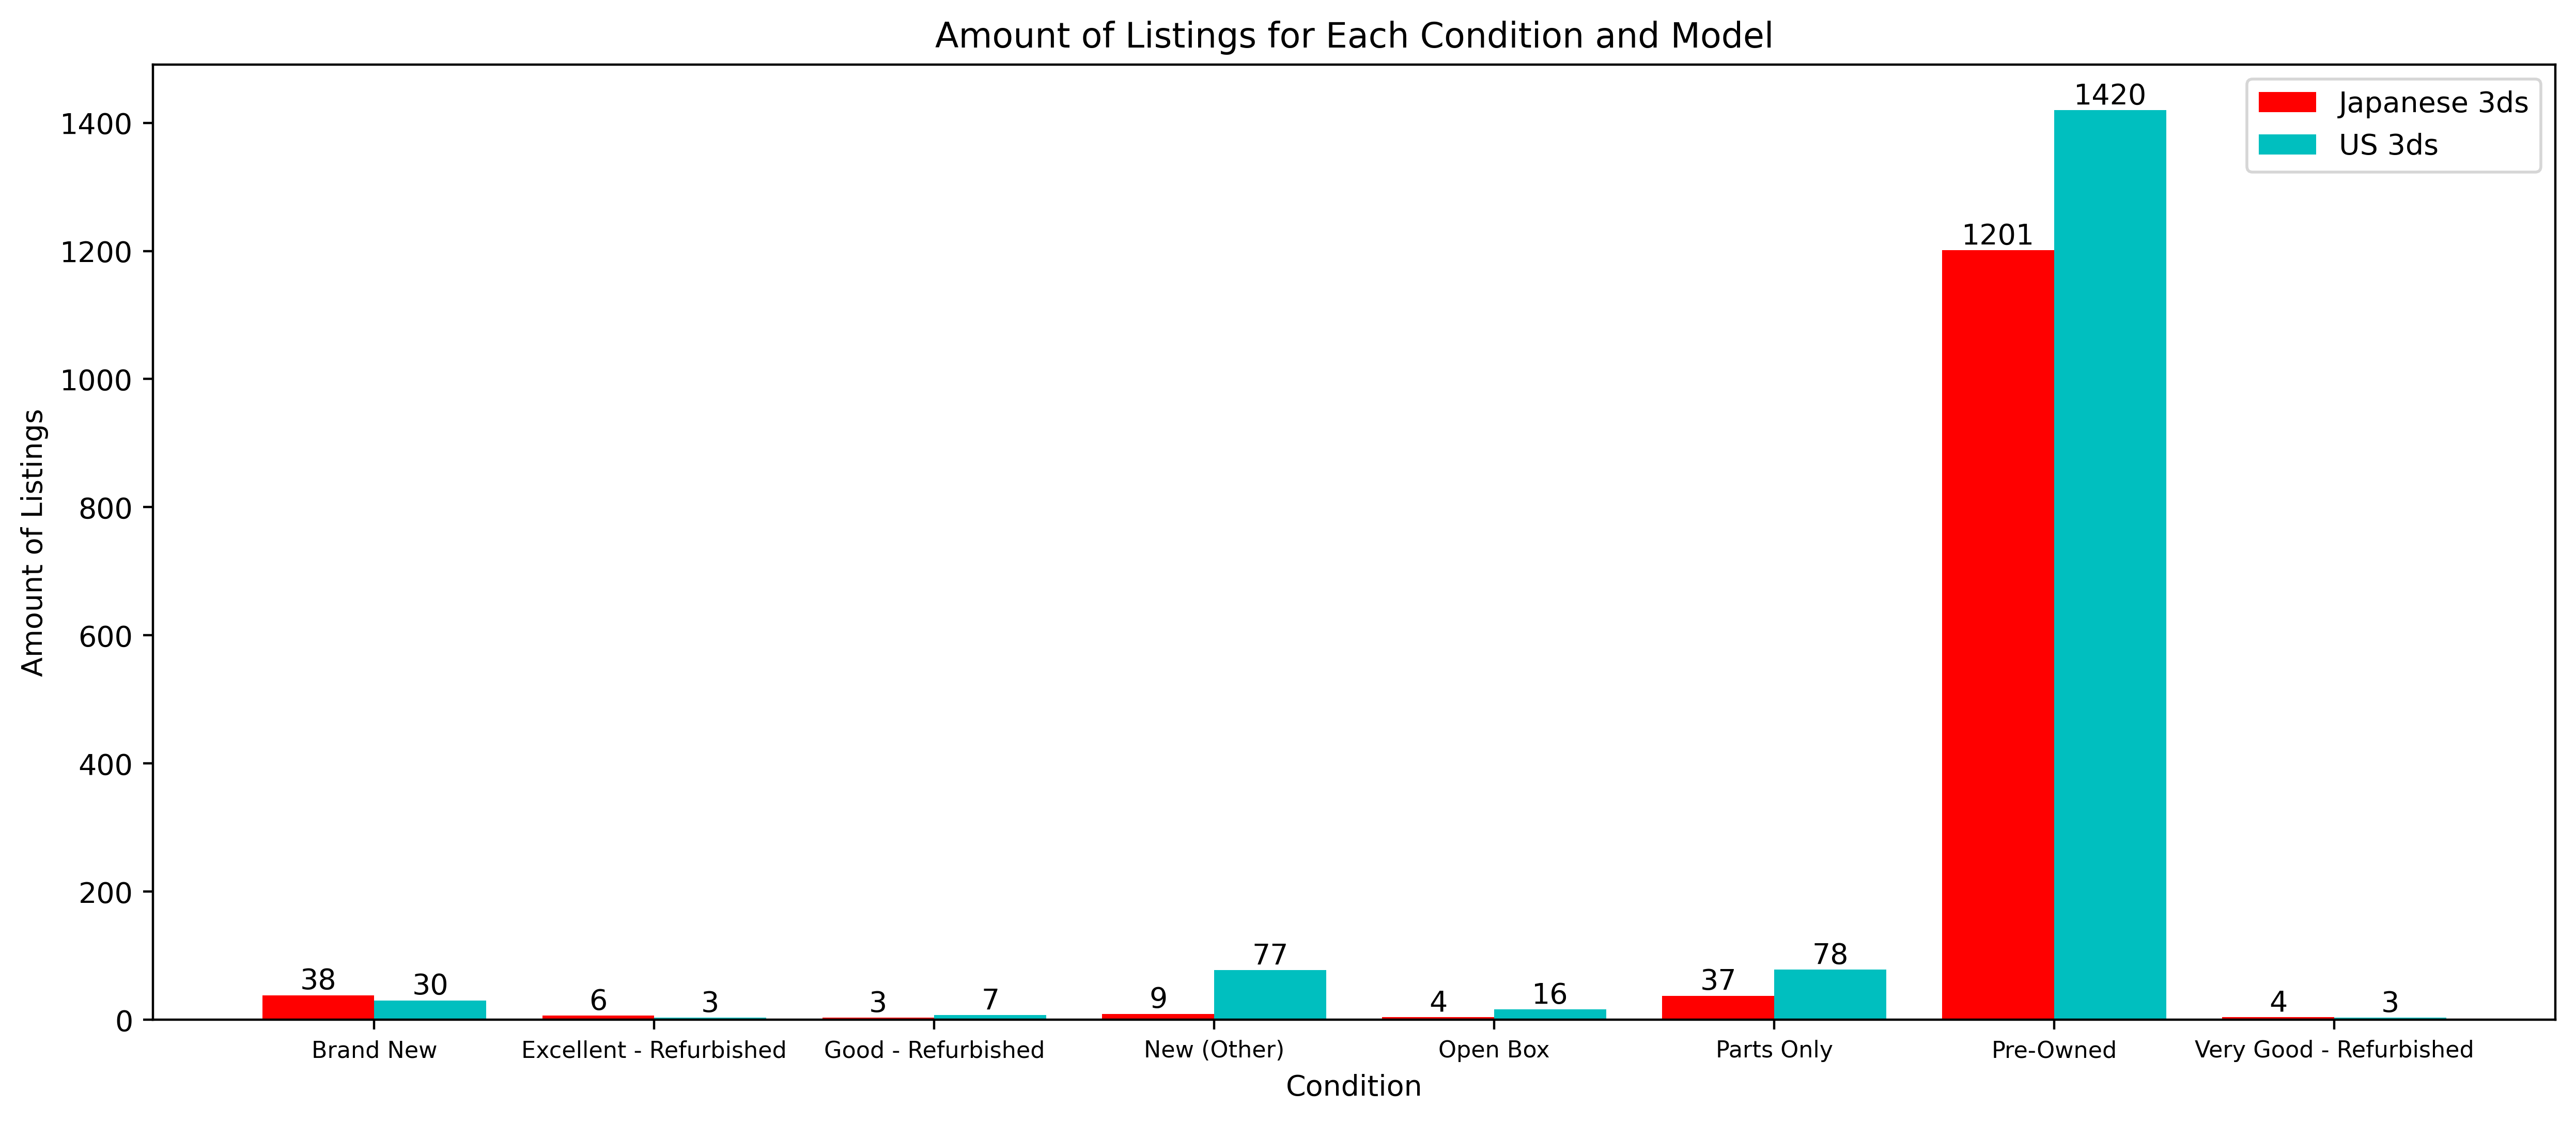

In [89]:
jp_count = ll_df.groupby("Condition").size()
us_count = xl_df.groupby("Condition").size()

plt.figure(figsize=(15,6), dpi= 400)
jc = plt.bar(x_axis - 0.2, jp_count, 0.4, label= "Japanese 3ds", color= "r")
uc = plt.bar(x_axis + 0.2, us_count, 0.4, label = "US 3ds", color= "c")

plt.xticks(x_axis, sorted(x), fontsize= 8)
plt.title("Amount of Listings for Each Condition and Model")
plt.xlabel("Condition")
plt.ylabel("Amount of Listings")

plt.bar_label(jc)
plt.bar_label(uc)
plt.legend()


plt.show()

In [90]:
pre_owned_count = df_fin.loc[df_fin["Condition"] == "Pre-Owned"].shape[0]
total_count = df_fin.shape[0]
percentage_of_pre_owned = pre_owned_count / total_count
percentage_of_pre_owned

0.8927111716621253

### Listing Price to Shipping

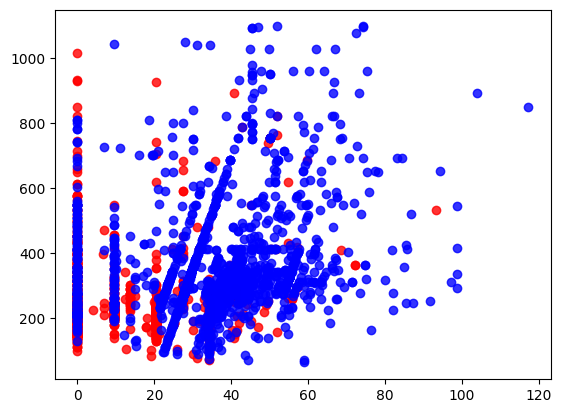

In [91]:
plt.scatter(ll_df["Shipping"], ll_df["Price"], alpha= 0.8, color= 'r')
plt.scatter(xl_df["Shipping"], xl_df["Price"], alpha= 0.8, color= 'b')
plt.show()

In [100]:
free_ship_count = df_fin.loc[df_fin["Shipping"] == 0].shape[0]
free_ship_percentage = free_ship_count / total_count
print("total percentage of free shipping: " + str(free_ship_percentage))

jp_free_ship = df_fin.loc[(df_fin["Shipping"] == 0) & (df_fin["Model"] == "LL")].shape[0]
jp_free_ship_percentage = jp_free_ship / free_ship_count
print("Percentage of japanese listings with free shipping: " + str(jp_free_ship_percentage))

us_free_ship = df_fin.loc[(df_fin["Shipping"] == 0) & (df_fin["Model"] == "XL")].shape[0]
us_free_ship_percentage = us_free_ship / xl_df.shape[0]
print("Percentage of American listings with free shipping: " + str(us_free_ship_percentage))

total percentage of free shipping: 0.2183242506811989
Percentage of japanese listings with free shipping: 0.7425897035881436
Percentage of American listings with free shipping: 0.10097919216646267


### Graphing Average Shipping Price Based on Model and Condition

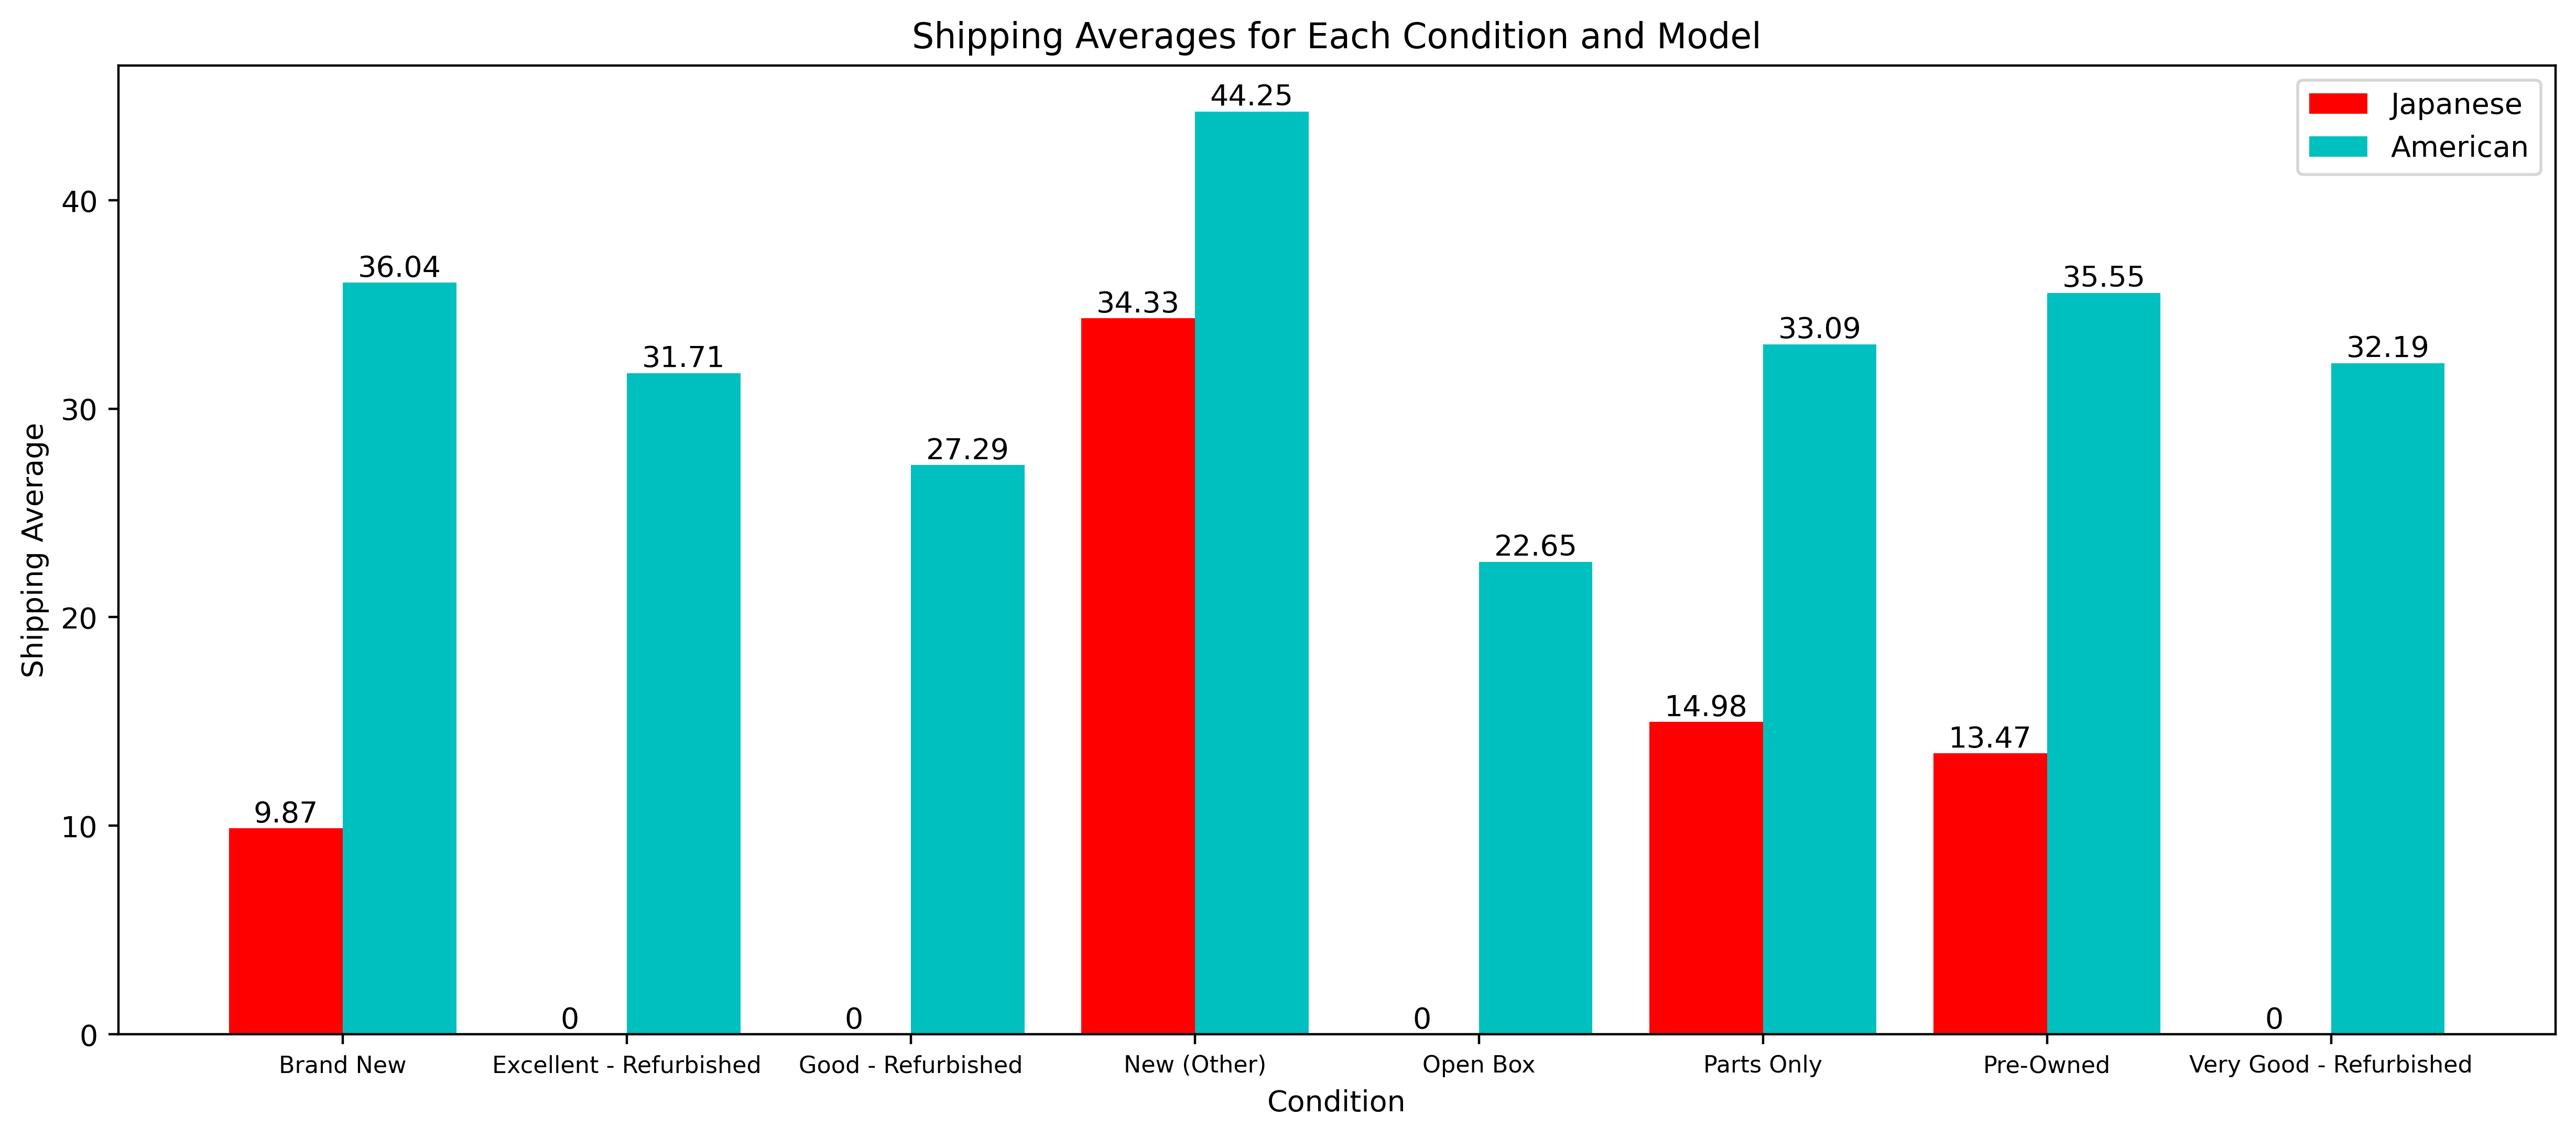

In [93]:
jp_ship = ll_df.groupby("Condition")["Shipping"].mean()
us_ship = xl_df.groupby("Condition")["Shipping"].mean()


plt.figure(figsize=(15,6), dpi= 400)
js = plt.bar(x_axis - 0.2, jp_ship.round(decimals= 2), 0.4, label= "Japanese", color= 'r')
us = plt.bar(x_axis + 0.2, us_ship.round(decimals= 2), 0.4, label= "American", color= 'c')

plt.xticks(x_axis, sorted(x), fontsize= 8)
plt.title("Shipping Averages for Each Condition and Model")
plt.xlabel("Condition")
plt.ylabel("Shipping Average")

plt.bar_label(js)
plt.bar_label(us)
plt.legend()

plt.show()

### Conclusion:
From the graphs, a few insights emerge:
1. American versions of the console are more expensive on average compared to their japanese counterparts. In particular, the most commonly listed condition, pre-owned consoles, Japanese consoles are significantly cheaper than American consoles. On average, a pre-owned New Nintendo 3ds LL is about 30% cheaper than a pre-owned New Nintendo 3ds XL
2. About 89% of all listings are pre-owned, with the majority of the listings being the Japanese version. This could be the reason as to why the New Nintendo 3ds LL are priced lower to their American counterpart. Nintendo sold 4.93 million New Nintendo 3ds LL in Japan and 4.40 million New Nintendo 3ds Xl in The Americas, which Nintendo defines as both North and South America. The similar number of units sold in both regions do not align with the numbers of listings per region. A possible explanation for this could be the smaller demand for resale in Japan due to their larger sales per capita, and as a result there is now an excess of supply in Japan coming to the Americas via eBay. 
3. Around 22% of all listings have free shipping, with New 3ds LL listings accounting for around 74% of the free shipping listings. Furthermore, on average, every Japanese version has cheaper shipping per condition compared to American version listings, despite international shipping fees being higher than domestic shipping fees. Only 10% of XL listings 
### Possible Issues:
There were a few omitted factors in this notebook:
1. Due to the complexity, I have opted to omit listings which sell multiple versions in one listing. These listings often have multiple colours, ranging from commonly sold colours to limited edition ones, resulting in a large difference in price. For the most part these limited edition consoles have also been omitted as outliers, as they are worth astronomically more than a standard 3ds
2. Japanese 3ds are "region locked" and do not have an option to change the system language. The only way to undo the region lock is to "jailbreak" the console and install custom firmware. This could contribute to the lower prices on Japanese consoles, as American consoles do not require any software modifications. 
3. The notebook specifically compares the prices of non-auction listings as the price of these auctions are not set and change until the auction finishes. As a result, these prices are inaccurate and have been removed from the analysis, but auctions with very little time left have also been removed, which could have been an accurate reflection of the price.
4. A few of these listings are bundles, particularly the ones with an unknown condition, which can include other accessories and physical games which would raise the listing price. In the future I would like to construct a webscraper that is able to determine which listings are bundles to provide a more accurate visualization. 
5. Pre-Owned listings have their own internal quality condition, which some sellers provide photos, and sometimes their own personal grading scale. As a result, some pre-owned listings can be considered nearly brand-new and some can also be considered as nearly parts-only, which affects their price. That being said, many of the listings are posted in an "acceptable" condition, with minimal scratches and fully functioning buttons. 